# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import ttest_1samp
from scipy import stats
from scipy.stats import chi2_contingency

In [3]:
shop_behavior=pd.read_csv('C:\\Users\\XUF064\\Documents\\Tests\\shopping_behavior_updated.csv')
shop_trend=pd.read_csv('C:\\Users\\XUF064\\Documents\\Tests\\shopping_trends.csv')

In [32]:
print(shop_behavior.columns)
print(shop_behavior.shape)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')
(3900, 18)


In [33]:
print(shop_trend.columns)
print(shop_trend.shape)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')
(3900, 19)


In [54]:
print(shop_trend.head)

<bound method NDFrame.head of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2              

In [35]:
print(shop_trend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [36]:
print(shop_trend.describe(include='all'))

        Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean    1950.500000    44.068462    NaN            NaN       NaN   
std     1125.977353    15.207589    NaN            NaN       NaN   
min        1.000000    18.000000    NaN            NaN       NaN   
25%      975.750000    31.000000    NaN            NaN       NaN   
50%     1950.500000    44.000000    NaN            NaN       NaN   
75%     2925.250000    57.000000    NaN            NaN       NaN   
max     3900.000000    70.000000    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count             3900.000000     3900  3900   3900    3900    3900.000000   
unique                    N

In [37]:
print(sum(shop_trend['Discount Applied']==shop_trend['Promo Code Used'])) #these two colomns are the same

3900



Understood dataset, decide to use shop_trend since more variant. Inspected description of the dataframe, found no null

Two variants to be further marked
1. Previous purchases: defination, seems to be number of history orders made by the consumer
2. Frequency of purchases: need to change to numaric data if modeling with non-tree or non-rule models


# Define Business Needs and Questions to be Analyzed

## 1. Business Needs

- Increase subscription
- Increase review rating
- Find high value consumers
- Increase conversion

## 2. Questions to be Analyzed

- Need to inspect consumer journey to recognize opportunities. But with this data set can provide profile/behavior difference between subscripted and non-subscripted and provide indication
- Define high/low rating, and provide consumer difference between the two (like if low review concentrate on certain product or consumer profile group) to provide suggestion, but might need survey or interview to locate real problem
- Define high value consumers (purchase amount * frequence) and find profile/behavior difference between high/low value consumers
- Use pre-purchase indicators to find which category consumer tent to purchase (classifier models) and how much would they pay in the transaction (regression models) - *this will just for coding practice, since limitation of variance. If data set contains products purchased at the same time in one transaction, can also use Apriori analysis to find connection and recommend product.*

# Analysis

## Increase Subscription

### 1. Subscription vs. Numaric: histogram and t-test

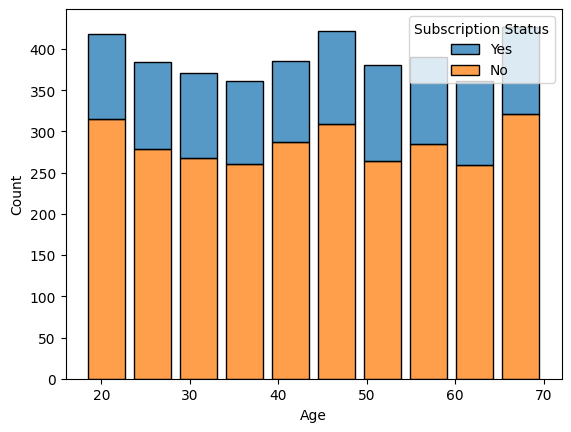

In [39]:
sns.histplot(data=shop_trend,x='Age',hue='Subscription Status',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

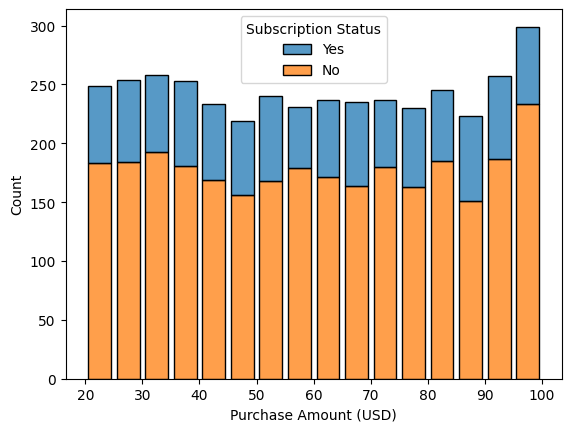

In [40]:
sns.histplot(data=shop_trend,x='Purchase Amount (USD)',hue='Subscription Status',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

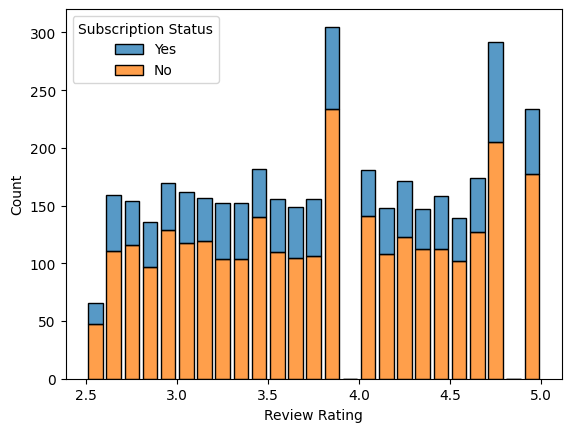

In [41]:
sns.histplot(data=shop_trend,x='Review Rating',hue='Subscription Status',multiple='stack',shrink=0.8,binwidth=0.1)
plt.show()

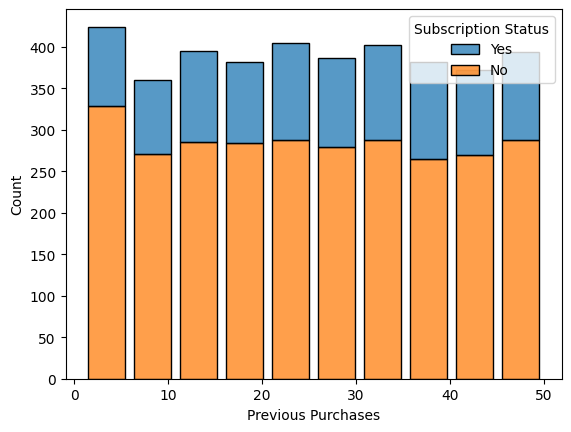

In [42]:
sns.histplot(data=shop_trend,x='Previous Purchases',hue='Subscription Status',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

After exploring, no big difference except for review ratings, which is also weird. This might be a fake data set. I will run t-test between registration status and review rating to see if any statistic meaning in this.

In [43]:
tt = stats.ttest_ind(shop_trend[shop_trend['Subscription Status']=='No']['Review Rating'],shop_trend[shop_trend['Subscription Status']=='Yes']['Review Rating'])
print('statistic:',tt.__getattribute__("statistic"))
print('pvalue:',tt.__getattribute__('pvalue'))

statistic: 0.39759093978742127
pvalue: 0.6909535107423552


P-value>0.05, not significant.

### 2. Subscription vs. categorical: stacked bar chart and ka-squre or Fisher Exact test

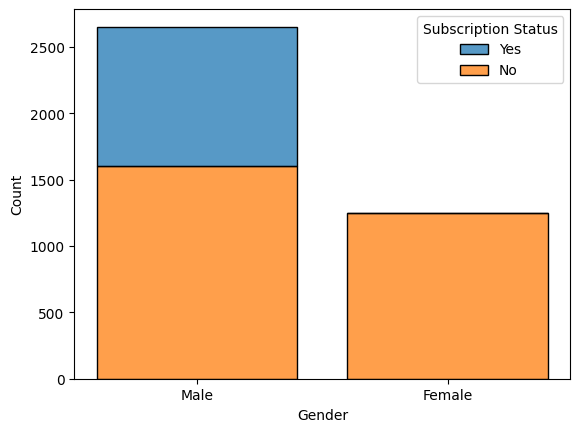

In [45]:
sns.histplot(data=shop_trend,x='Gender',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

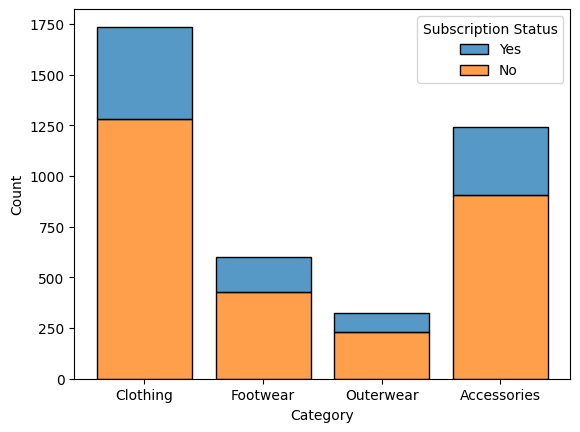

In [46]:
sns.histplot(data=shop_trend,x='Category',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

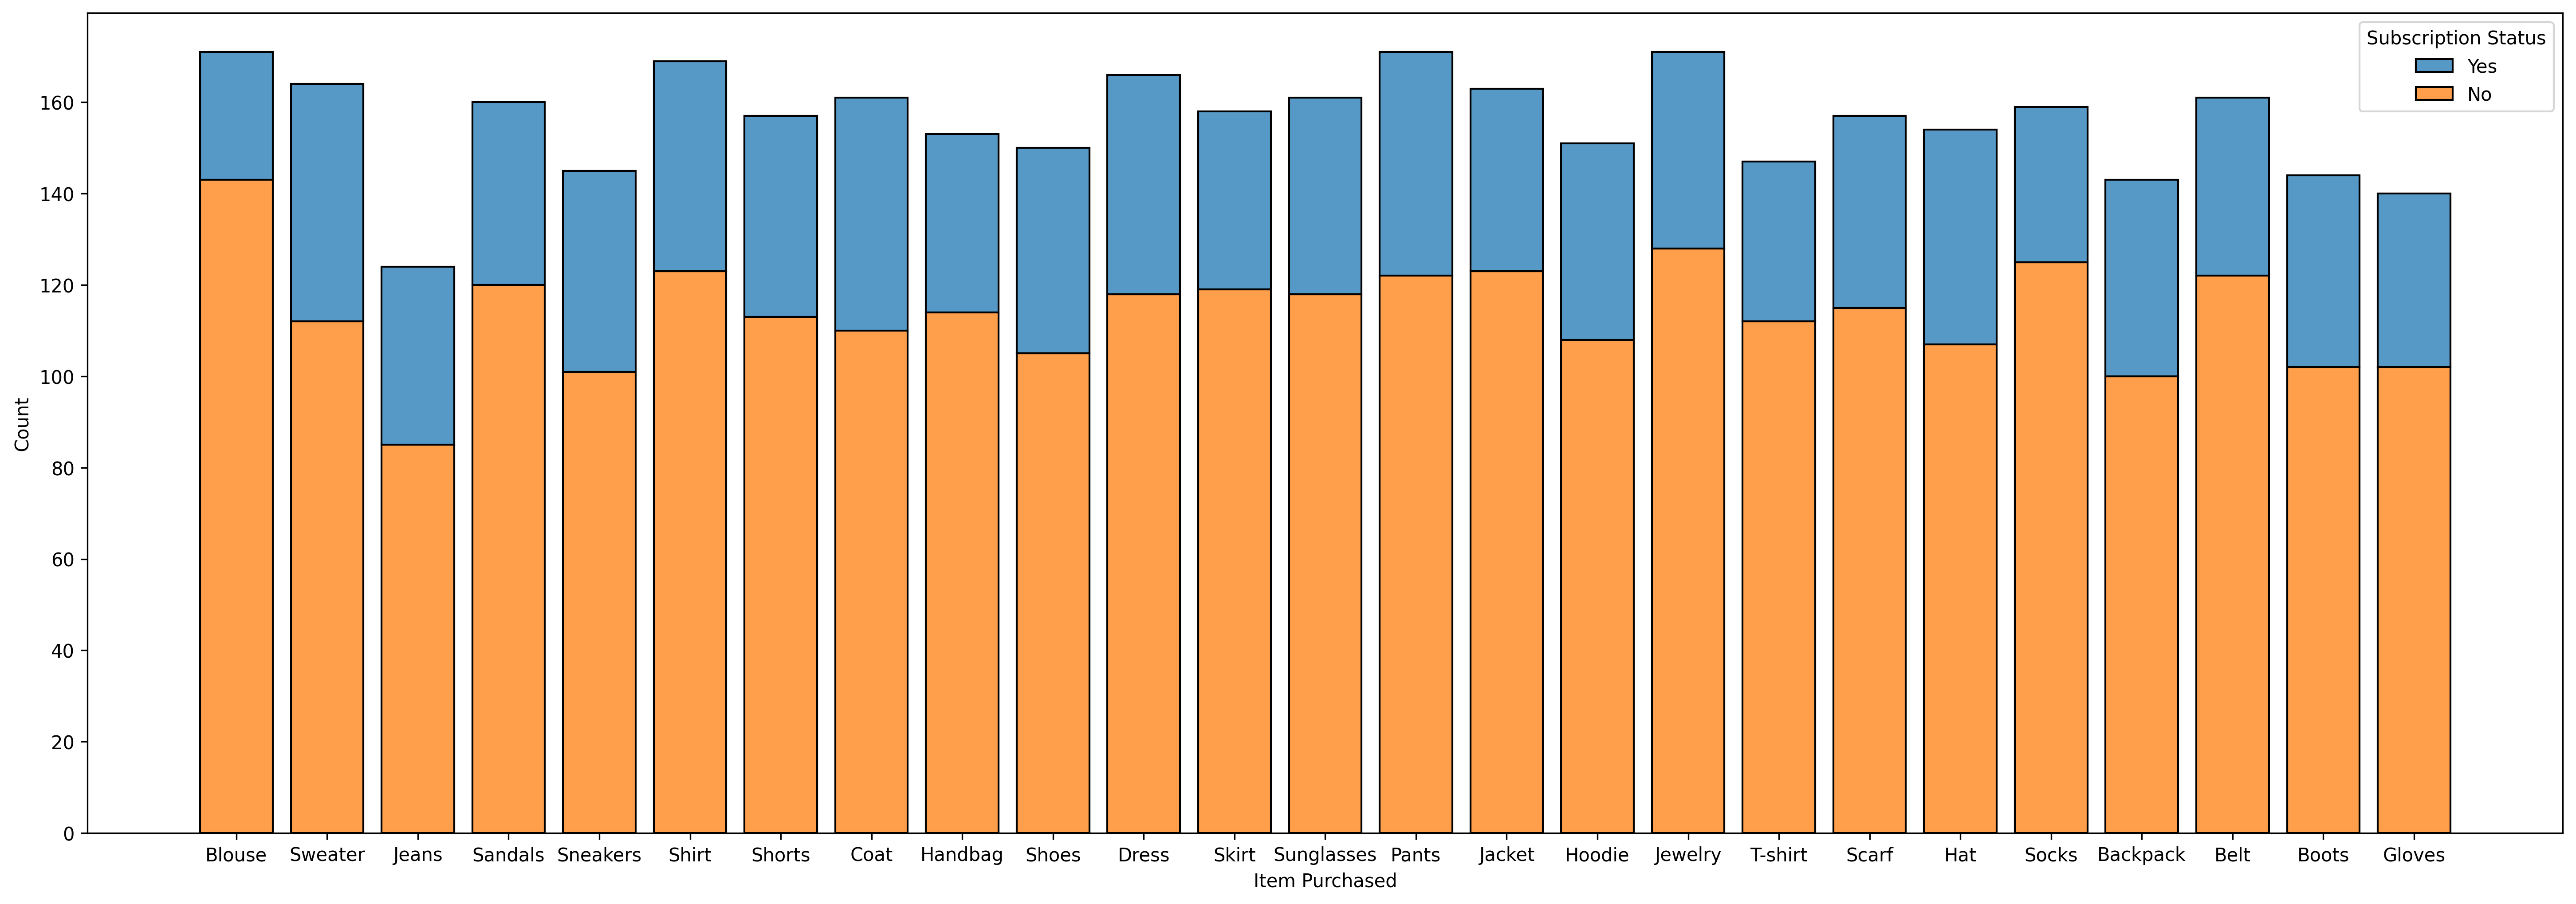

In [90]:
plt.figure(dpi=300,figsize=(24,8))
sns.histplot(data=shop_trend,x='Item Purchased',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

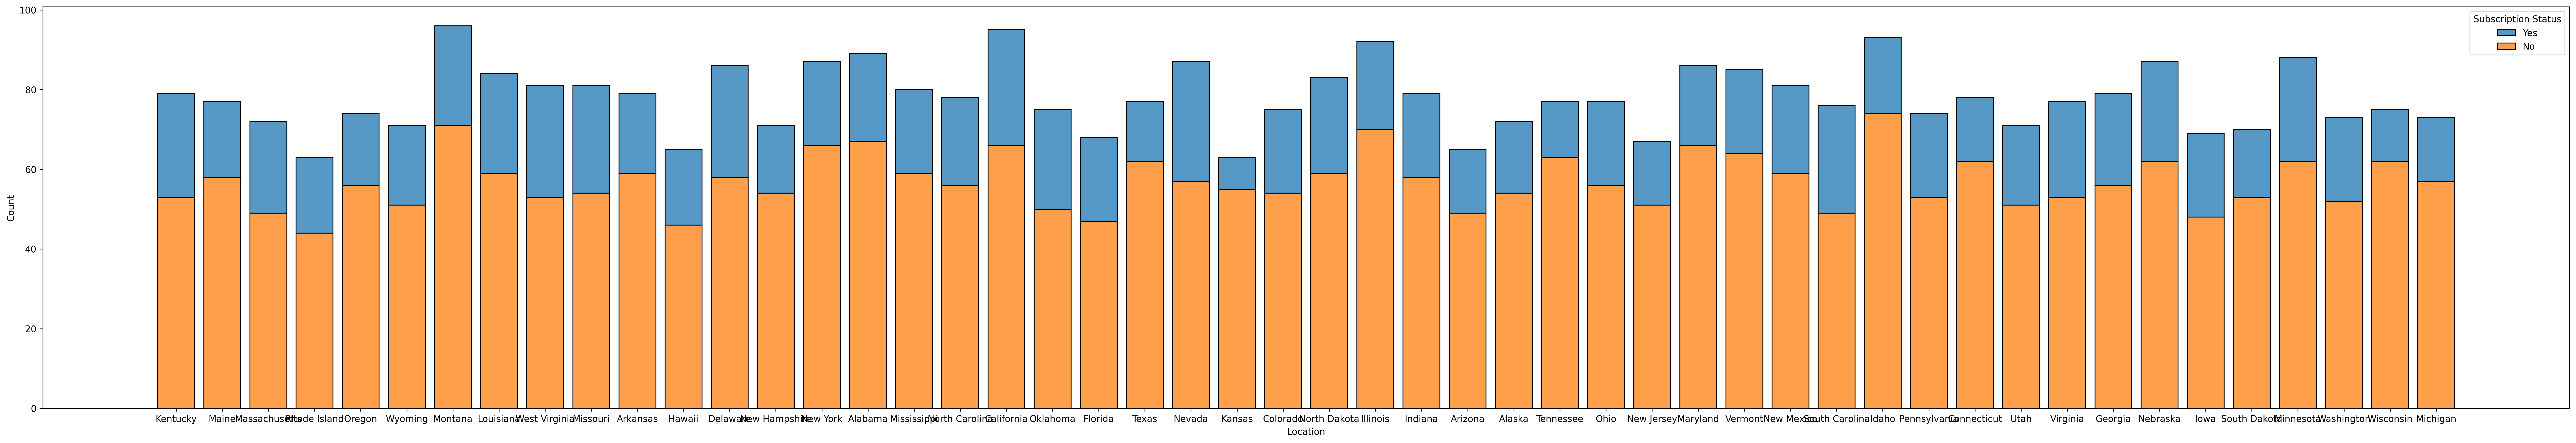

In [92]:
plt.figure(dpi=300,figsize=(50,8))
sns.histplot(data=shop_trend,x='Location',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

In [4]:
#check if difference by region
usa=pd.read_csv('C:\\Users\\XUF064\\Documents\\Tests\\American States Mapping.csv')
print(usa.head())

  Abbreviation  State Name     Region
0           AL     Alabama  Southeast
1           AK      Alaska       West
2           AZ     Arizona  Southwest
3           AR    Arkansas  Southeast
4           CA  California       West


In [5]:
merge_shop=pd.merge(shop_trend,usa,left_on='Location',right_on='State Name',how='left')
print(merge_shop.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Payment Method  Shipping Type  \
0       Kentucky    L       Gray  Winter  ...     Credit Card        Express   
1          Maine    L     Maroon  Winter  ...   Bank Transfer        Express   
2  Massachusetts    S     Maroon  Spring  ...            Cash  Free Shipping   
3   Rhode Island    M     Maroon  Spring  ...          PayPal   Next Day Air   
4         Oregon    M  Turquoise  Spring  ...            Cash  Free Shipping   

  Discount Applied Promo Code Used Previous Purcha

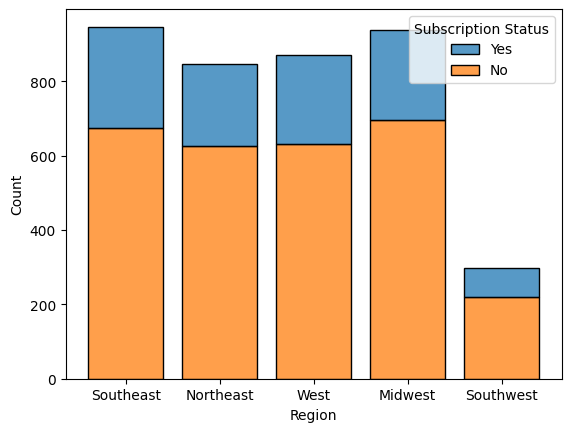

In [59]:
sns.histplot(data=merge_shop,x='Region',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

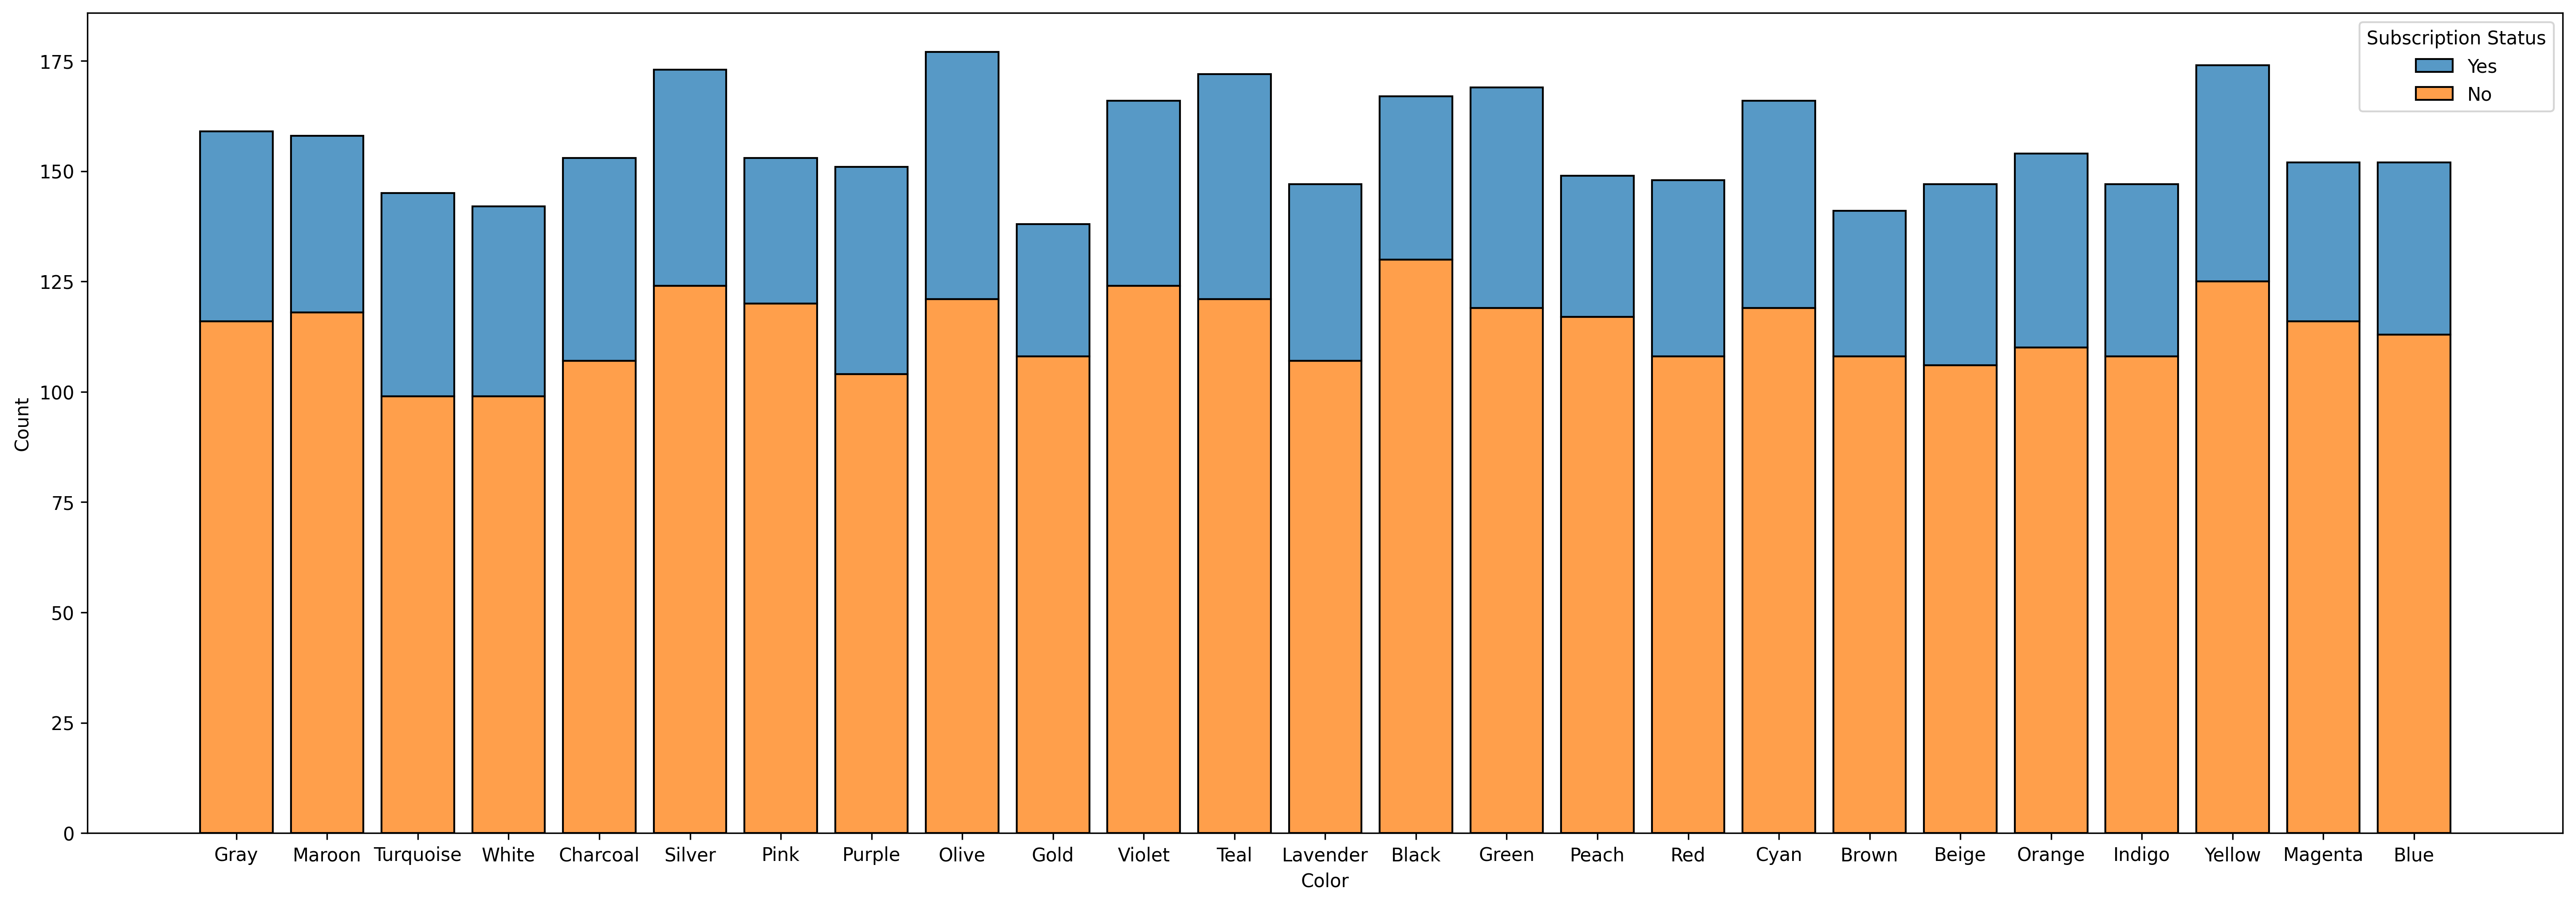

In [93]:
plt.figure(dpi=300,figsize=(24,8))
sns.histplot(data=shop_trend,x='Color',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

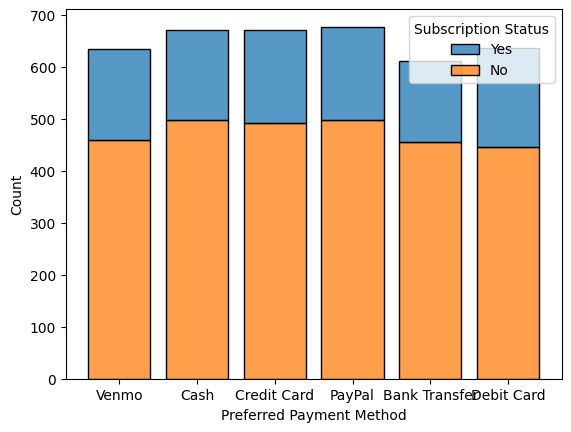

In [50]:
sns.histplot(data=shop_trend,x='Preferred Payment Method',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

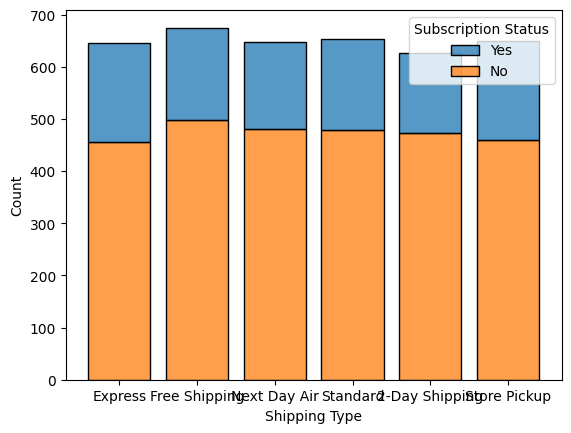

In [51]:
sns.histplot(data=shop_trend,x='Shipping Type',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

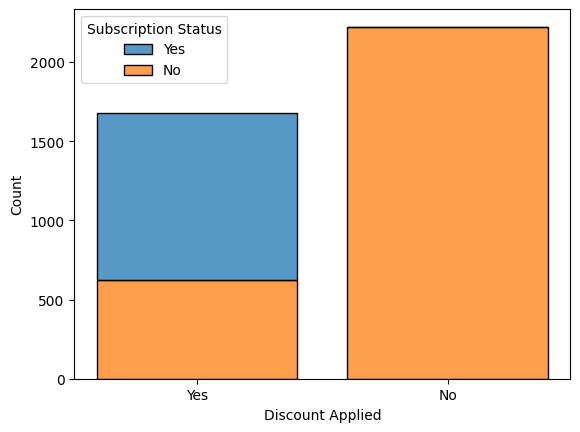

In [52]:
sns.histplot(data=shop_trend,x='Discount Applied',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

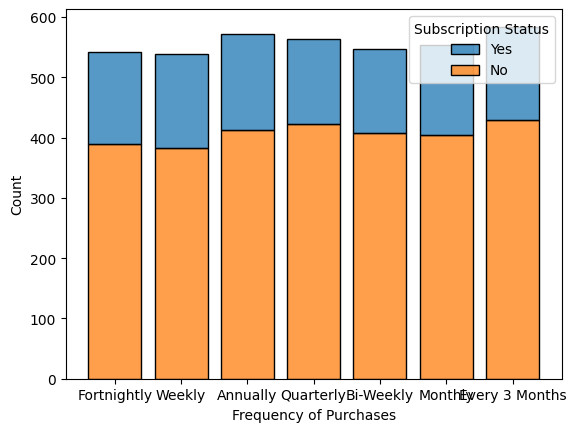

In [53]:
sns.histplot(data=shop_trend,x='Frequency of Purchases',hue='Subscription Status',multiple='stack',shrink=0.8)
plt.show()

Meaningful variants: Gender, Category(need further exploration), Discount Applied, Region(southwest, need further exploration). Will further take ka-squred test or Fisher exact test

In [64]:
#Gender vs. Subscription
t_g=pd.pivot_table(shop_trend,values='Customer ID',index='Subscription Status',columns='Gender',aggfunc='count')
t_g=t_g.fillna(0)
print(t_g)

Gender               Female    Male
Subscription Status                
No                   1248.0  1599.0
Yes                     0.0  1053.0


In [65]:
#Since there's 0 in the table, will choose Fisher Exact Test
gender_fish=stats.fisher_exact(t_g)
gender_fish.pvalue

1.1784921093013208e-214

In [66]:
#Category vs. Subscription
t_c=pd.pivot_table(shop_trend,values='Customer ID',index='Subscription Status',columns='Category',aggfunc='count')
print(t_c)

Category             Accessories  Clothing  Footwear  Outerwear
Subscription Status                                            
No                           906      1280       428        233
Yes                          334       457       171         91


In [72]:
#Apply K2 test
cat_k2=chi2_contingency(t_c)
cat_k2.pvalue

0.7186167320249088

In [73]:
#Discount YN vs. Subscription
t_d=pd.pivot_table(shop_trend,values='Customer ID',index='Subscription Status',columns='Discount Applied',aggfunc='count')
t_d=t_d.fillna(0)
print(t_d)

Discount Applied         No     Yes
Subscription Status                
No                   2223.0   624.0
Yes                     0.0  1053.0


In [75]:
#Since there's 0 in the table, will choose Fisher Exact Test
dis_fish=stats.fisher_exact(t_d)
dis_fish.pvalue

0.0

In [78]:
#Region vs. Subscription
t_r=pd.pivot_table(merge_shop,values='Customer ID',index='Subscription Status',columns='Region',aggfunc='count')
print(t_r)

Region               Midwest  Northeast  Southeast  Southwest  West
Subscription Status                                                
No                       696        625        674        220   632
Yes                      241        221        273         78   240


In [79]:
#Apply K2 test
reg_k2=chi2_contingency(t_r)
reg_k2.pvalue

0.5682681691363938

In [84]:
#Separate southwest and others
merge_shop['sw_yn']=merge_shop.apply(lambda x:1 if x.Region=='Southwest' else 0, axis=1)
t_r1=pd.pivot_table(merge_shop,values='Customer ID',index='Subscription Status',columns='sw_yn',aggfunc='count')
print(t_r1)

sw_yn                   0    1
Subscription Status           
No                   2627  220
Yes                   975   78


In [85]:
#Apply K2 test
reg_k2=chi2_contingency(t_r1)
reg_k2.pvalue

0.7901526620739086

### Conclusion

There are 2 variables significantly related to subscription

1. Geder, non of women purchasers subscribed while purchasing, if no user journey difference was designed between the two gender, this difference might due to lack of female oriented benefit. Can try to add female loved benefit of subscription.(can interview for insight)
2. Discount Applied, all registered consumers used discount while purchasing. Can use discount as a hook to recruit consumers with in-site touch points and paid ads

## Increase Review Rating

### 1. Define high/low review rating:

a. Discuss with business   
b. Use distribution

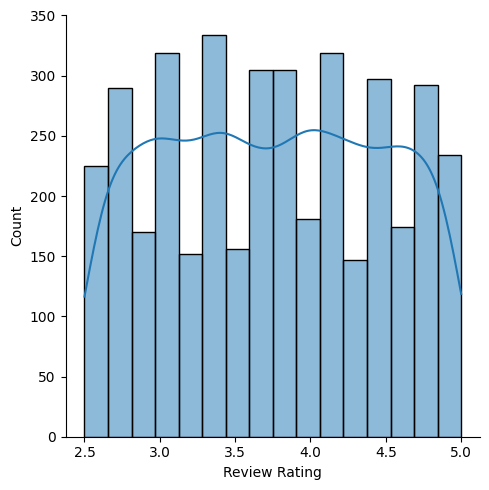

In [96]:
#distribution plot of review rating
sns.displot(data=merge_shop['Review Rating'],kde=True)
plt.show()

<Axes: ylabel='Review Rating'>

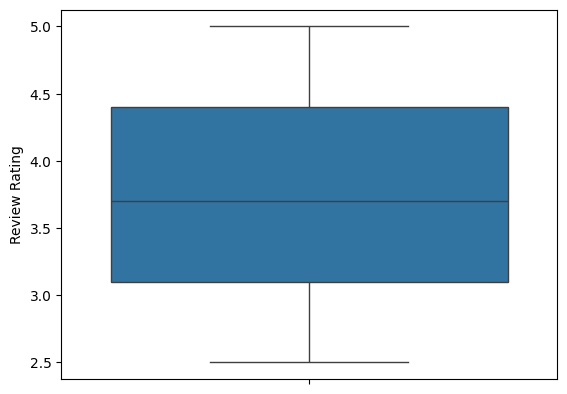

In [97]:
sns.boxplot(y=merge_shop['Review Rating'])

In [101]:
print("Average Review Rating:", merge_shop['Review Rating'].mean().round(2))
print("75% Quantile Review Rating", merge_shop['Review Rating'].quantile(q=0.75))
print("Medium Review Rating", merge_shop['Review Rating'].quantile())
print("25% Quantile Review Rating", merge_shop['Review Rating'].quantile(q=0.25))

Average Review Rating: 3.75
75% Quantile Review Rating 4.4
Medium Review Rating 3.7
25% Quantile Review Rating 3.1


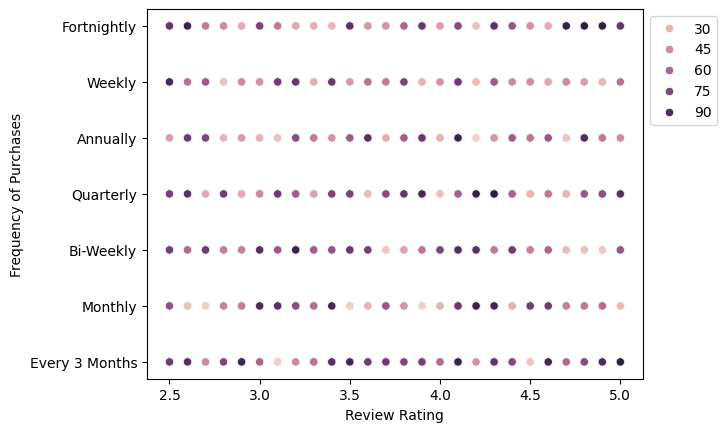

In [110]:
sns.scatterplot(data=merge_shop,x='Review Rating',y='Frequency of Purchases',hue='Purchase Amount (USD)')
plt.legend(loc=2,bbox_to_anchor=(1,1))
plt.show()

Overall, no significant concentration on review rating and no evidence shows certain rating affect purchase behavior significantly. Defining rating as:
- **High Rating**: >=4.4
- **Middle Rating**: 3.1-4.4
- **Low Rating**: <3.1

### 2. Find Corelation (similar to analysis in the last section)

Age, gender, item purchased & category, pruchase amount, location & region, size, color, season, payment method, if use preferred payment method, shipping type, discount applied, previous purchases, frequency of purchase

In [10]:
#Separate review rating by 3 levels
merge_shop['Rating_Level']=merge_shop['Review Rating'].apply(lambda x: "High" if x>=4.4 else "Low" if x<3.1 else 'Mid')
print(merge_shop[['Review Rating','Rating_Level']].head())

   Review Rating Rating_Level
0            3.1          Mid
1            3.1          Mid
2            3.1          Mid
3            3.5          Mid
4            2.7          Low


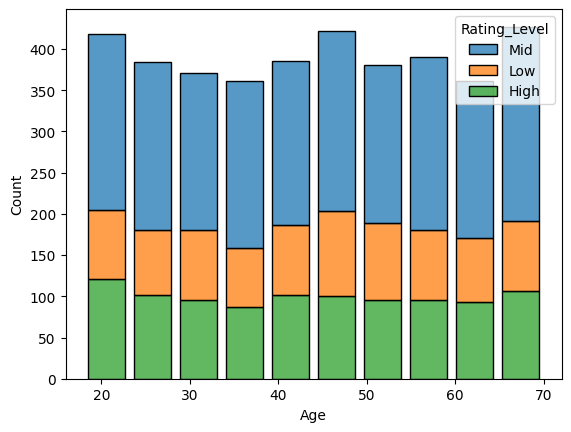

In [11]:
sns.histplot(data=merge_shop,x='Age',hue='Rating_Level',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

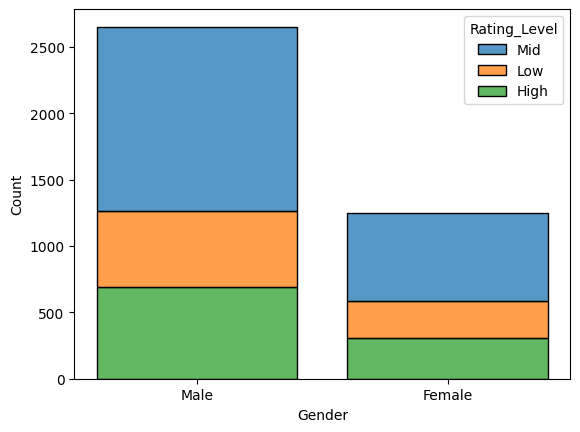

In [28]:
sns.histplot(data=merge_shop,x='Gender',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

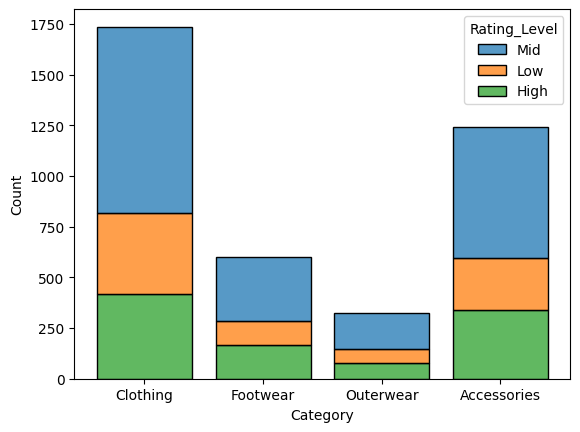

In [29]:
sns.histplot(data=merge_shop,x='Category',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

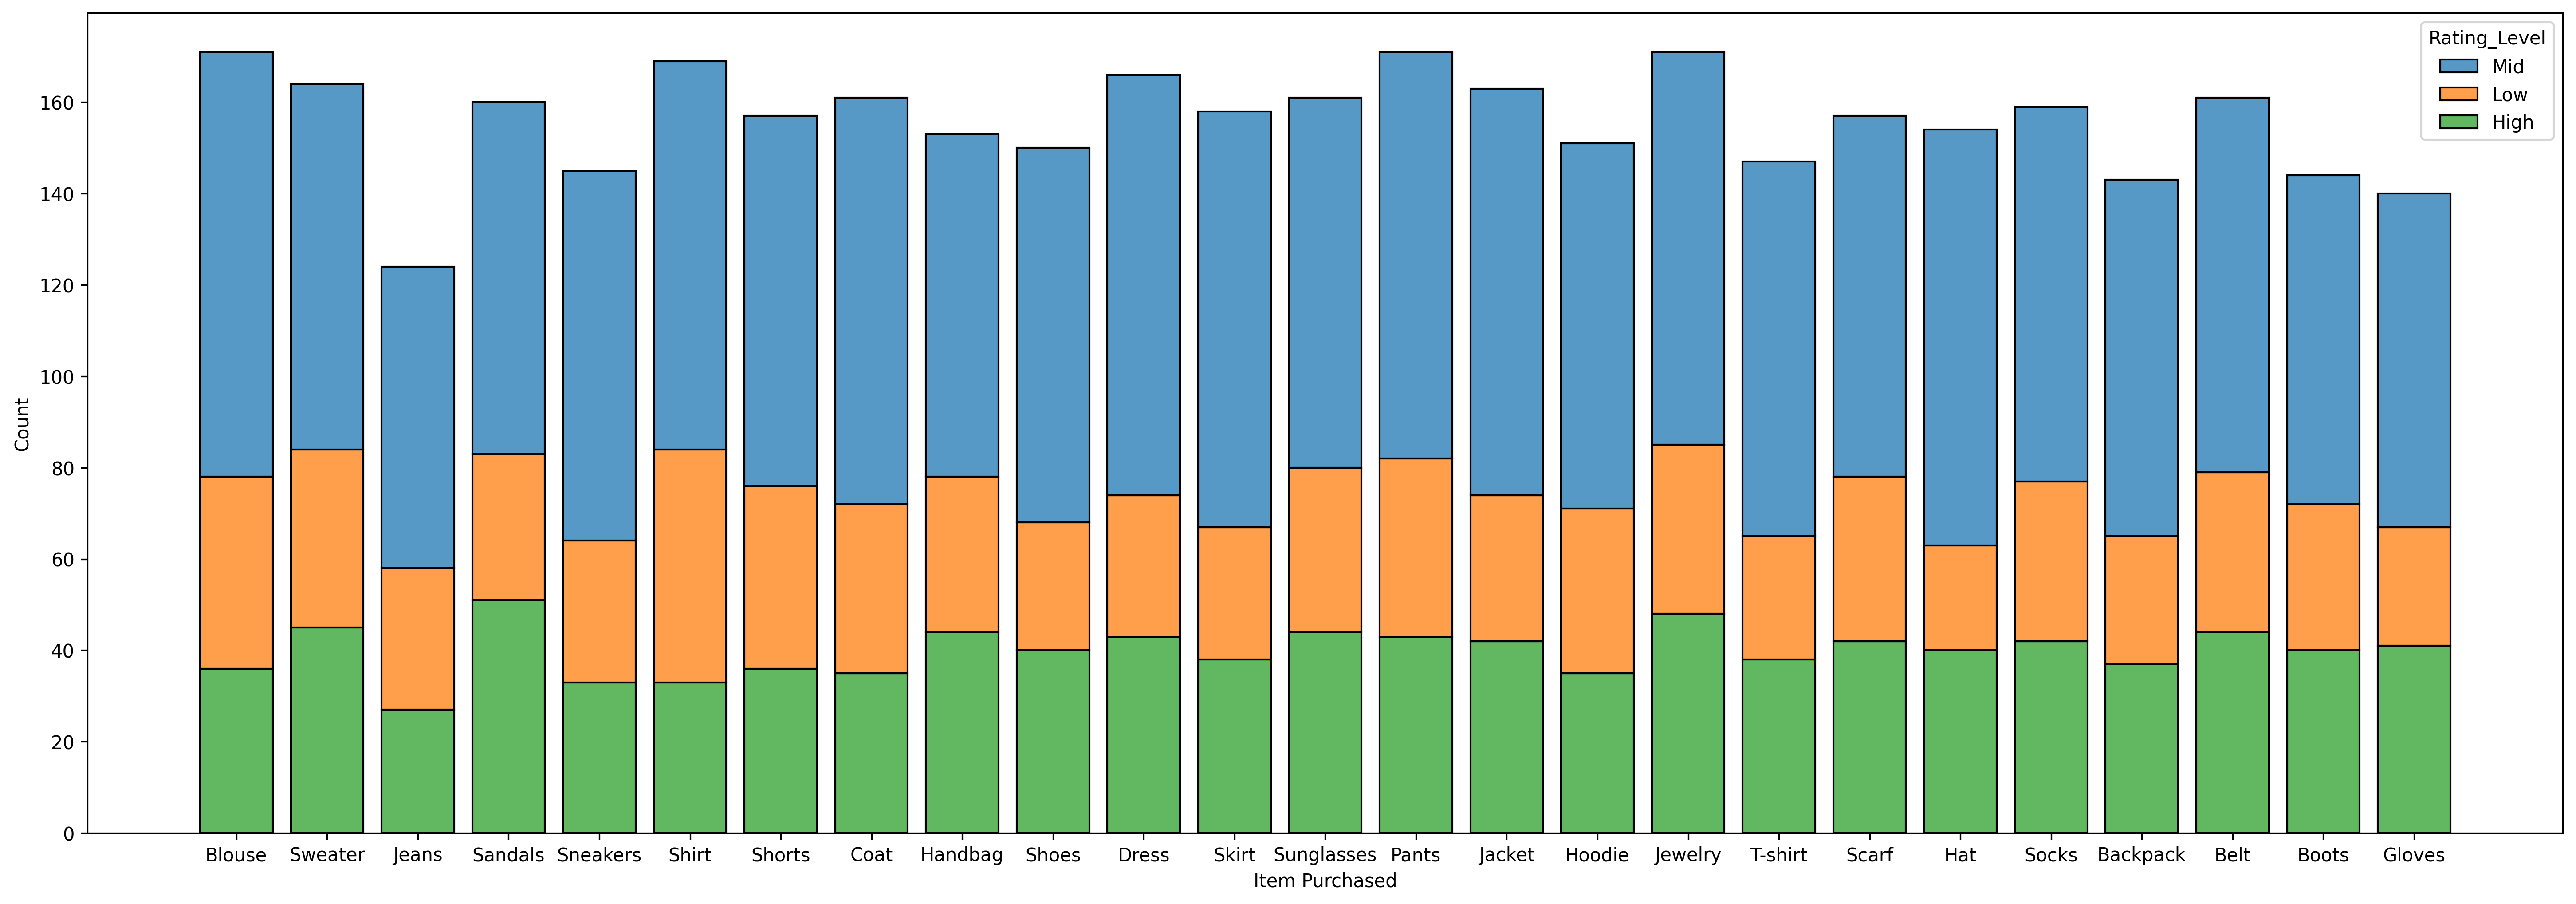

In [30]:
plt.figure(dpi=300,figsize=(24,8))
sns.histplot(data=merge_shop,x='Item Purchased',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

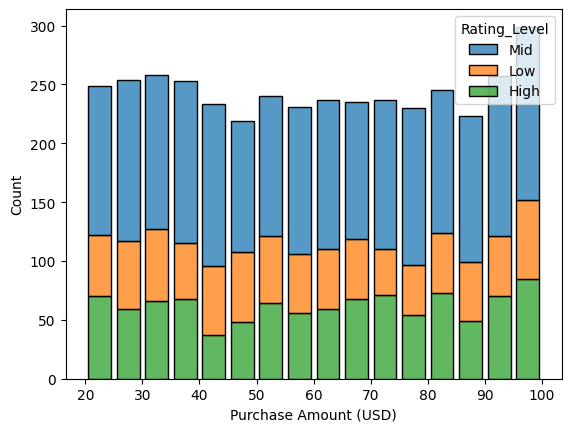

In [17]:
sns.histplot(data=merge_shop,x='Purchase Amount (USD)',hue='Rating_Level',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

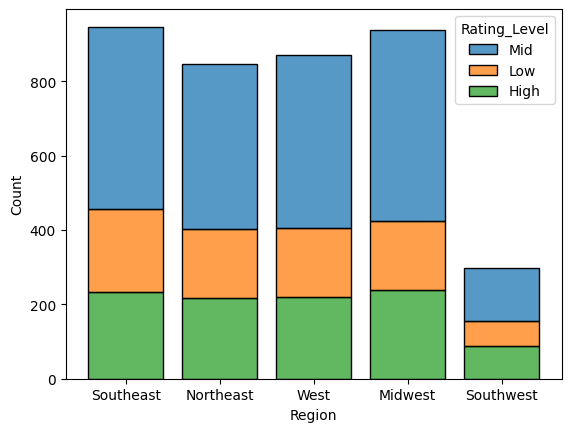

In [31]:
sns.histplot(data=merge_shop,x='Region',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

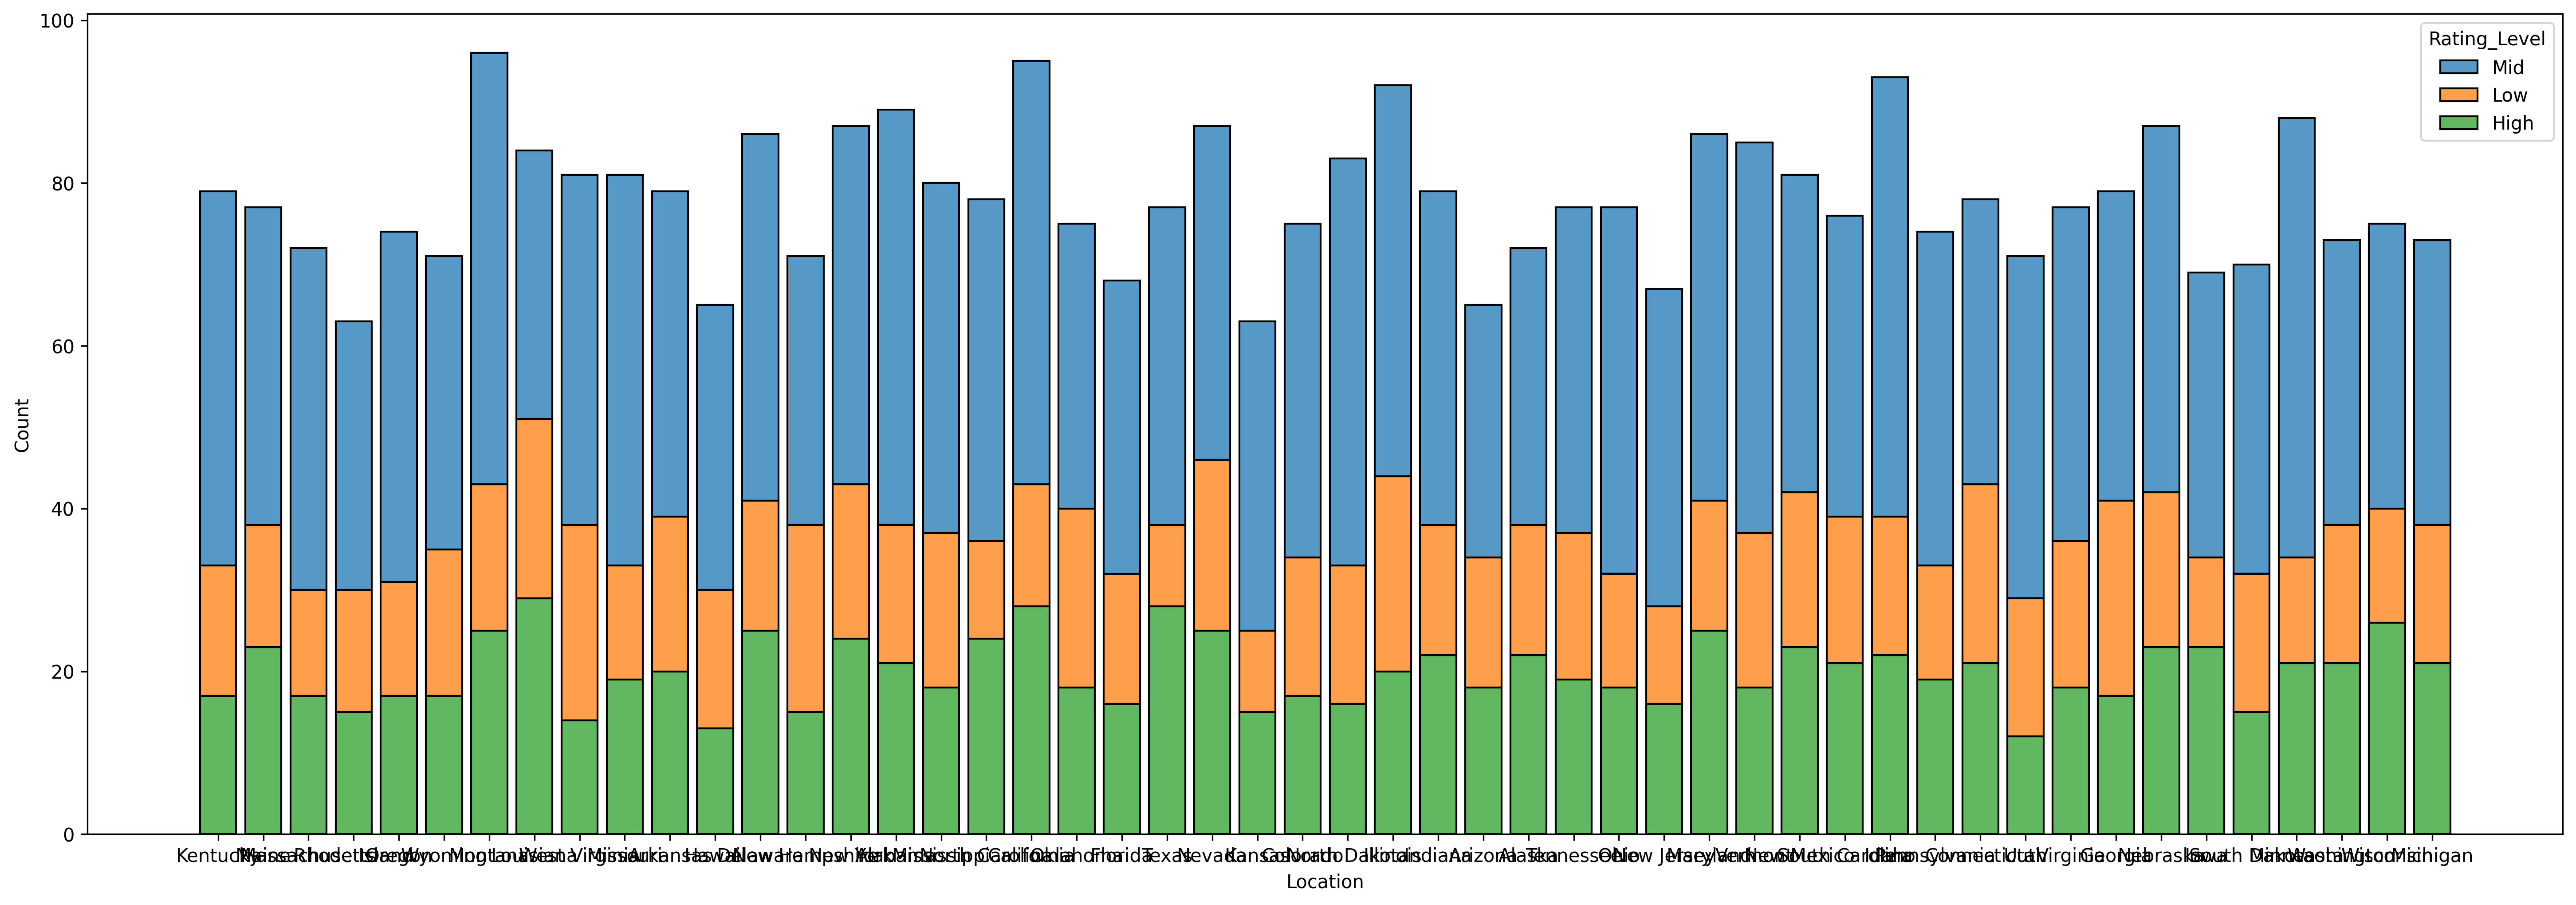

In [32]:
plt.figure(dpi=300,figsize=(24,8))
sns.histplot(data=merge_shop,x='Location',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

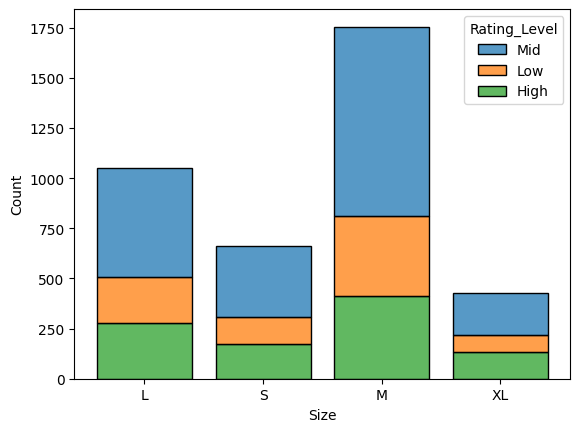

In [33]:
sns.histplot(data=merge_shop,x='Size',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

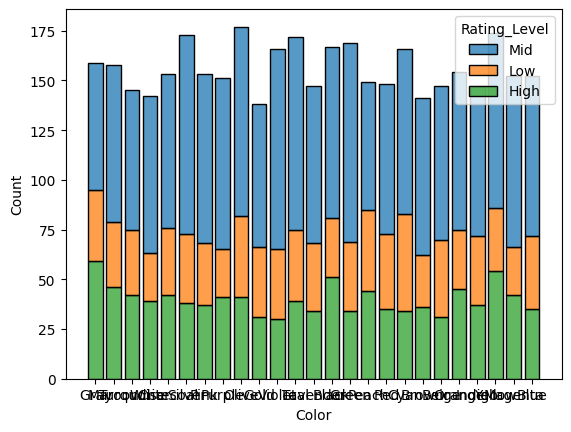

In [21]:
sns.histplot(data=merge_shop,x='Color',hue='Rating_Level',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

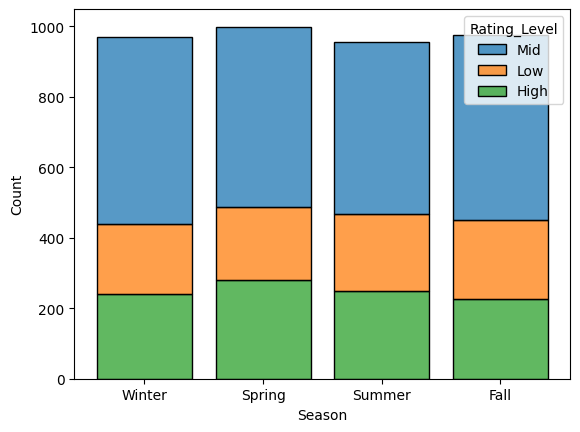

In [34]:
sns.histplot(data=merge_shop,x='Season',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

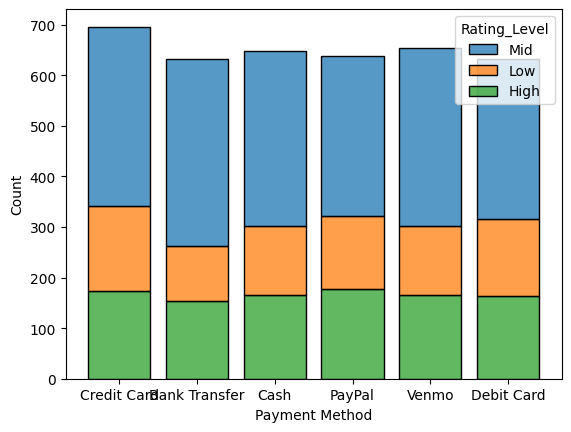

In [35]:
sns.histplot(data=merge_shop,x='Payment Method',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

In [24]:
#prefer payment is payment or not
merge_shop['Preferred_Pay_YN']=merge_shop.apply(lambda x: 'Yes' if x['Payment Method']==x['Preferred Payment Method'] else 'N',axis=1)
print(merge_shop[['Payment Method','Preferred Payment Method','Preferred_Pay_YN']].head())

  Payment Method Preferred Payment Method Preferred_Pay_YN
0    Credit Card                    Venmo                N
1  Bank Transfer                     Cash                N
2           Cash              Credit Card                N
3         PayPal                   PayPal              Yes
4           Cash                   PayPal                N


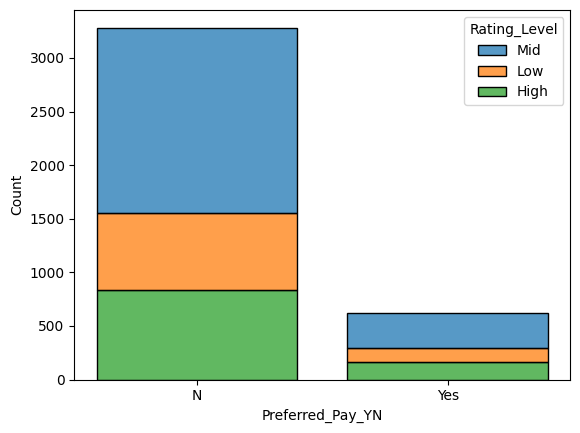

In [36]:
sns.histplot(data=merge_shop,x='Preferred_Pay_YN',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

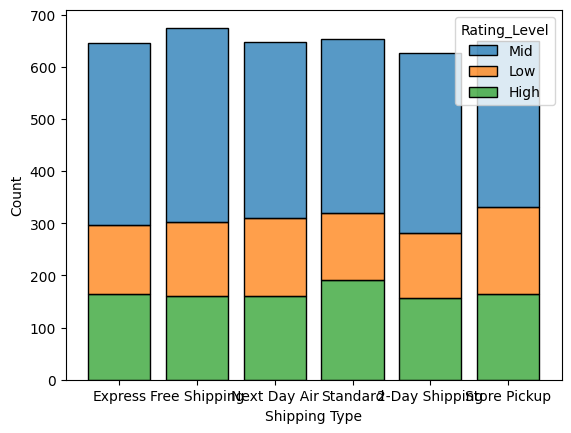

In [37]:
sns.histplot(data=merge_shop,x='Shipping Type',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

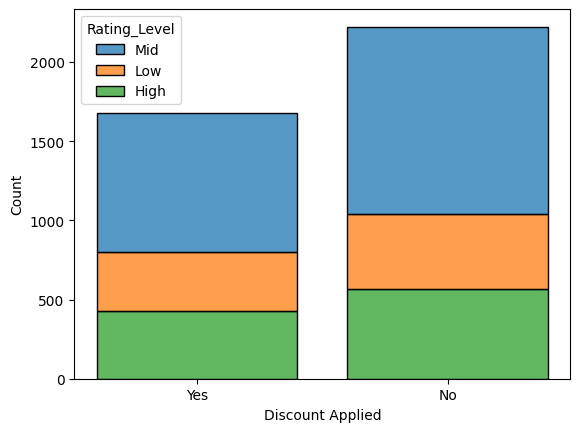

In [38]:
sns.histplot(data=merge_shop,x='Discount Applied',hue='Rating_Level',multiple='stack',shrink=0.8)
plt.show()

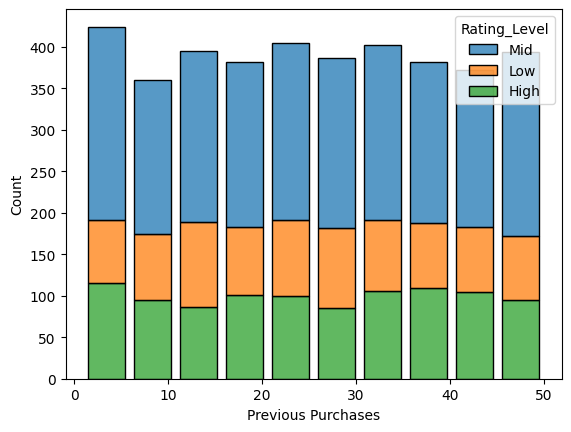

In [39]:
sns.histplot(data=merge_shop,x='Previous Purchases',hue='Rating_Level',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

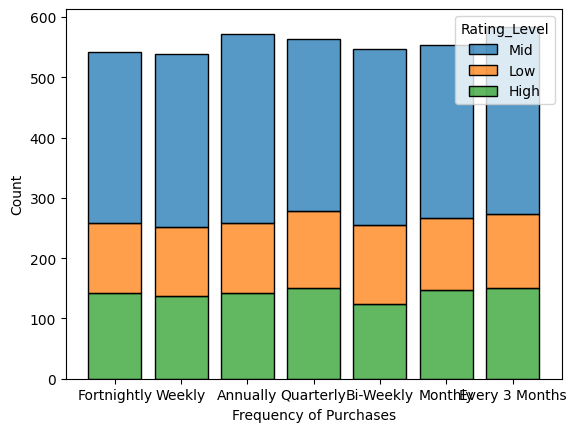

In [40]:
sns.histplot(data=merge_shop,x='Frequency of Purchases',hue='Rating_Level',multiple='stack',shrink=0.8,binwidth=5)
plt.show()

### Conclusion

No significant indicator of review level based on current data, need more behavioural data and consumer interview to explore further.

## Find High-value Customers

### Define High-value Customers

### Find Difference

### Conclusion